## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!pip install pyjanitor==0.23.1

## **Coleta de dados**


In [83]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## **Analisando dados ausentes**


Porcentagem média de dados ausentes por coluna

In [84]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

Se existe alguma célula com valor nulo

In [101]:
df.isna().any().any()

True

missingno fornece um pequeno conjunto de ferramentas de visualizações e utilitários de dados ausentes flexíveis e fáceis de usar que permitem obter um resumo visual rápido da integridade (ou falta dela) de seu conjunto de dados.

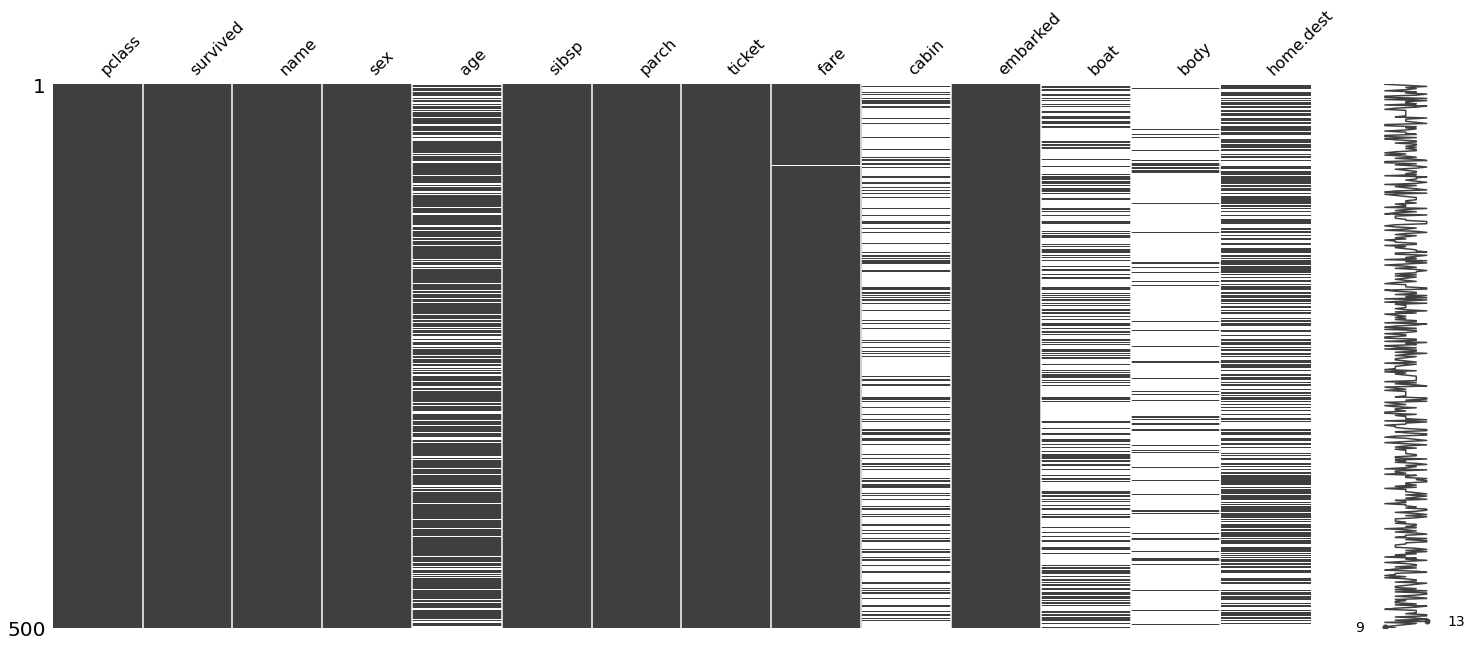

In [85]:
import missingno as msno
msno.matrix(df.sample(500))

Gives a bar chart of the missing values (quantidade de dados não faltantes)


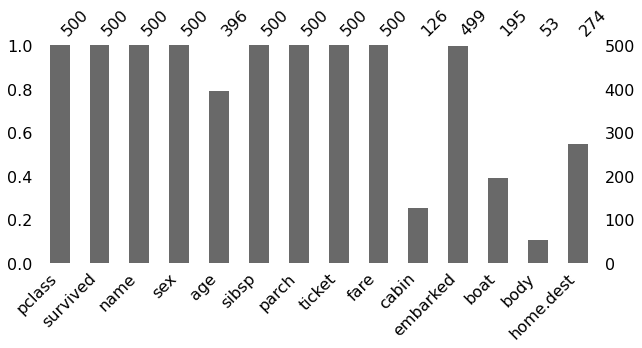

In [86]:
msno.bar(df.sample(500),figsize=(10,4))

Gráfico de barras usando Pandas (Percentual de dados não ausentes)

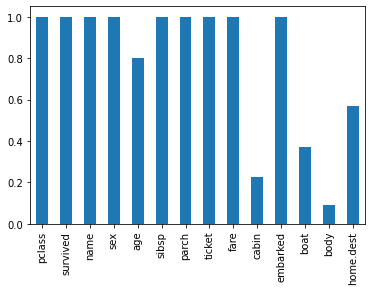

In [87]:
fig, ax = plt.subplots(figsize=(6,4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

O mapa de calor de correlação mede a correlação de nulidade: quão fortemente a presença ou ausência de uma variável afeta a presença de outra.

A correlação de nulidade varia de -1(se uma variável aparece, a outra definitivamente não) a 0(variáveis ​​que aparecem ou não aparecem não têm efeito uma sobre a outra) até 1(se uma variável aparece, a outra definitivamente também).

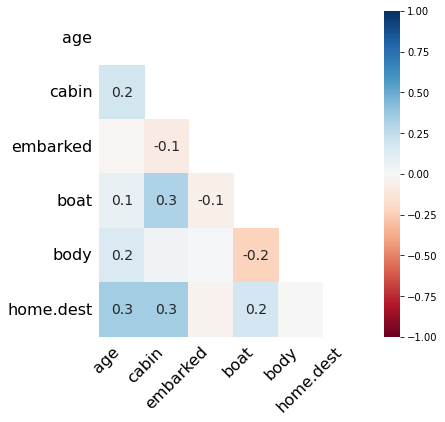

In [88]:
msno.heatmap(df.sample(500),figsize=(6,6))

O dendrograma permite correlacionar de forma mais completa a conclusão variável, revelando tendências mais profundas do que as pares visíveis no mapa de calor de correlação

Folhas que estão no mesmo nível prevêem a presença uma da outra (vazia ou preenchida). Os braços verticais são usados ​​para indicar quão diferentes são os clusters. Braços curtos significam que os ramos são semelhantes

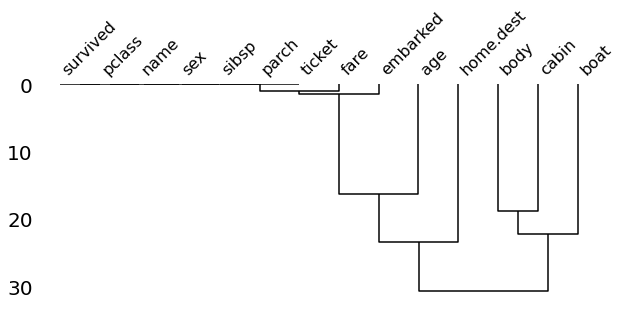

In [89]:
msno.dendrogram(df,figsize=(10,4))

## **Descartando dados ausentes**


Descartando linhas que tem dados ausentes

In [90]:
df1 = df.dropna()
df1.isnull().sum()

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

Descartando colunas que tem dados ausentes (por coluna)

In [91]:
df1 = df.drop(columns="cabin")
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Descartando colunas que tem dados ausentes (tudo de uma vez) 





In [92]:
df1 = df.dropna(axis=1)
df1.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,0.0,0.0,24160
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,1.0,2.0,113781
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,1.0,2.0,113781
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,1.0,2.0,113781
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,2.0,113781


## **Imputando dados ausentes**


In [93]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns #lista todas as colunas que são númericas

im = SimpleImputer(strategy='most_frequent') #mean, median , most_frequency
# im = SimpleImputer(strategy='constant', fill_value = -1) #constant
imputed = im.fit_transform(df[num_cols])
pd.DataFrame(imputed, columns=num_cols)

,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1.0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1.0
...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,328.0
1305,3.0,0.0,24.0000,1.0,0.0,14.4542,1.0
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,304.0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,1.0


In [94]:
from sklearn.experimental import enable_iterative_imputer #necessário para importar o IterativeImputer
from sklearn.impute import IterativeImputer

num_cols = df.select_dtypes(
    include="number"
).columns #lista todas as colunas que são númericas

imputer = IterativeImputer()
imputed = imputer.fit_transform(df[num_cols])
pd.DataFrame(imputed, columns=num_cols)

,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.00000,0.0,0.0,211.3375,160.644539
1,1.0,1.0,0.91670,1.0,2.0,151.5500,160.688563
2,1.0,0.0,2.00000,1.0,2.0,151.5500,160.688955
3,1.0,0.0,30.00000,1.0,2.0,151.5500,135.000000
4,1.0,0.0,25.00000,1.0,2.0,151.5500,160.697284
...,...,...,...,...,...,...,...
1304,3.0,0.0,14.50000,1.0,0.0,14.4542,328.000000
1305,3.0,0.0,24.74902,1.0,0.0,14.4542,160.821401
1306,3.0,0.0,26.50000,0.0,0.0,7.2250,304.000000
1307,3.0,0.0,27.00000,0.0,0.0,7.2250,160.828808


Os valores ausentes de cada amostra são imputados usando o valor médio dos n_neighbors vizinhos mais próximos encontrados no conjunto de treinamento.

In [95]:
from sklearn.impute import KNNImputer

num_cols = df.select_dtypes(
    include="number"
).columns #lista todas as colunas que são númericas

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df[num_cols])
pd.DataFrame(imputed, columns=num_cols)

,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.0000,0.0,0.0,211.3375,134.6
1,1.0,1.0,0.9167,1.0,2.0,151.5500,167.4
2,1.0,0.0,2.0000,1.0,2.0,151.5500,167.4
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,179.4
...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,328.0
1305,3.0,0.0,26.5000,1.0,0.0,14.4542,130.4
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,304.0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,199.4


Certifique-se que caso esteja com amostras separadas de treino e testes, preencha o de teste baseado no de treino para evitar vazamento de informações

method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None



```
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)
```



In [96]:
df2 = df.fillna(0)
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,0,C,0,328.0,0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,0.0000,1.0,0.0,2665,14.4542,0,C,0,0.0,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,0,C,0,304.0,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,0,C,0,0.0,0


from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler, IterativeImputer

Mesma ideia dos bibliotecas do scikit-learn


In [97]:
#!pip install fancyimpute 
from fancyimpute import KNN
num_cols = df.select_dtypes(
    include="number"
).columns #lista todas as colunas que são númericas

knn_imputer = KNN()
imputed = knn_imputer.fit_transform(df[num_cols])
pd.DataFrame(imputed, columns=num_cols)

Imputing row 1/1309 with 1 missing, elapsed time: 0.311
Imputing row 101/1309 with 1 missing, elapsed time: 0.315
Imputing row 201/1309 with 0 missing, elapsed time: 0.319
Imputing row 301/1309 with 0 missing, elapsed time: 0.322
Imputing row 401/1309 with 1 missing, elapsed time: 0.325
Imputing row 501/1309 with 1 missing, elapsed time: 0.328
Imputing row 601/1309 with 1 missing, elapsed time: 0.331
Imputing row 701/1309 with 1 missing, elapsed time: 0.334
Imputing row 801/1309 with 2 missing, elapsed time: 0.338
Imputing row 901/1309 with 2 missing, elapsed time: 0.341
Imputing row 1001/1309 with 2 missing, elapsed time: 0.344
Imputing row 1101/1309 with 0 missing, elapsed time: 0.348
Imputing row 1201/1309 with 2 missing, elapsed time: 0.352
Imputing row 1301/1309 with 1 missing, elapsed time: 0.355


,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.00000,0.0,0.0,211.3375,49.789237
1,1.0,1.0,0.91670,1.0,2.0,151.5500,177.173680
2,1.0,0.0,2.00000,1.0,2.0,151.5500,177.211456
3,1.0,0.0,30.00000,1.0,2.0,151.5500,135.000000
4,1.0,0.0,25.00000,1.0,2.0,151.5500,145.079900
...,...,...,...,...,...,...,...
1304,3.0,0.0,14.50000,1.0,0.0,14.4542,328.000000
1305,3.0,0.0,21.39026,1.0,0.0,14.4542,326.740404
1306,3.0,0.0,26.50000,0.0,0.0,7.2250,304.000000
1307,3.0,0.0,27.00000,0.0,0.0,7.2250,239.721472


In [104]:
import janitor as jn

num_cols = df.select_dtypes(
    include="number"
).columns #lista todas as colunas que são númericas

df2 = jn.fill_empty(
    df,
    columns=num_cols,
    value=10
)

df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,10.0,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,10.0,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,10.0,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,10.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,10.0000,1.0,0.0,2665,14.4542,NaN,C,NaN,10.0,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,10.0,NaN


## **Acrescentando colunas informativas**


Informando se um valor estava ausente baseado em uma coluna



```
>>> df.assign(temp_f=lambda x: x.temp_c + 1)
          temp_c  temp_f
Portland    17.0    18.0
Berkeley    25.0    26.0
```



In [98]:
def add_indicator(col):
     def wrapper(df):
         return df[col].isna().astype(int)

     return wrapper

df1 = df.assign( #Assign new columns to a DataFrame
    cabin_missing=add_indicator("cabin")
)

df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,1
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,1
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [99]:
df1['cabin_missing'].loc[df1['cabin_missing'] == True].sum()

1014

In [100]:
df.cabin.isna().sum()

1014